## Example using R in JupyterNootebooks for tranforming Population statistic data files.

There are three sources used to analyse population statistics: Indian Registration System (ITK), Statisctic Canada, Inuit Tapirrit Kanatami (ITK).

For showing an example using R language in JupyterNotebooks we take one source file (ITK) and transform it into a suitable format that can be used to apply formulas and join with main TB data.

### Step 1. Importing necessary modules
  
Take native R libraries: readxl, writexl, ggplot2

In [59]:
install.packages("readxl")
install.packages("writexl")
install.packages("ggplot2")

library(readxl)
library(writexl)
library(ggplot2)

### Step 2. Load data from file

Since the excel sheet also contains other information like a header and descriptions, we specify the cells to start reading the data from using `range` argument. This ensures that the paragraphs do not confuse the creation of a tabular structure.

In [ ]:
file_path_incoming_data <- "data/INACData.xlsx"
file_path_outgoing_data <- "data/CTBRSResults.xlsx"

full_data <- as.data.frame(
  read_excel(
    file_path_incoming_data, sheet = 2, range = "A6:K195", col_names = FALSE
  )
)

### Step 2.1 Data with the current format

In [61]:
full_data

...1,...2,...3,...4,...5,...6,...7,...8,...9,...10,...11
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Canada,All ages,11316810,5736331,5580479,5869352,2739833,3129519,5447458,2996498,2450960
NA,0-4 years,474018,179171,294847,393359,161276,232083,80659,17895,62764
NA,5-9 years,657582,336217,321365,316966,191279,125687,340616,144938,195678
NA,10-14 years,723364,307470,415894,273813,45336,228477,449551,262134,187417
NA,15-19 years,555671,259978,295693,277761,237612,40149,277910,22366,255544
NA,20-24 years,503028,198583,304445,332841,49096,283745,170187,149487,20700
NA,25-29 years,514841,266867,247974,349966,129481,220485,164875,137386,27489
NA,30-34 years,648238,436033,212205,320262,149960,170302,327976,286073,41903
NA,35-39 years,777796,357473,420323,352283,95001,257282,425513,262472,163041


### Step 3. Creating data vectors (columns)

To create a new table in the new format that is usable for joining with TB data or to apply formulas, we extract the regions, ages, total_count, the count of males and the count of females. The count of population would be a list for all regions and all age groups. In our case the regions will be a list containing NAs as the regions column has multiline cells. The ages are categories repeated for each region, so they will contain duplicates.

In [62]:
regions <- na.omit(full_data[[1]])
ages <- unique(full_data[[2]])
total_count <- full_data[[3]]
male_count <- full_data[[4]]
female_count <- full_data[[5]]

### Step 3.1 Function of transforming data into a vector (if you need take some amount lines)

Creating a reusable function, which allows to get the different results by passing different parameters on the same logic.

Example: Get regions <- get_data(full_data, 1)

Documentation about functions in R: https://www.w3schools.com/r/r_functions.asp

In [63]:
get_data <- function(income_data, vector_number, count_lines = NULL) {
  data_set <- c()

  for (i in seq_along(income_data[[vector_number]])) {
    value <- income_data[[vector_number]][i]

    if (is.na(value)) {
      next
    }

    data_set <- c(data_set, value)

    if (!is.null(count_lines) && i == count_lines) {
      return(data_set)
    }
  }

  return(data_set)
}

### Step 4. Preparing the data table from the extracted fields.

A new data structure is created for easier access to all values of a region, and then one more level down to access based on the age groups. This will help prepare the new format of output.

In [64]:
structured_data <- list()
index <- 1

for (region in regions) {
  for (age in ages) {
    list <- list()
    list[[age]] <- c(
      total_count[index],
      male_count[index],
      female_count[index]
    )
    structured_data[[ region ]] <- c(structured_data[[ region ]], list)
    index <- index + 1
  }
}

### Step 5. Processing data. As an example we create one result table in a different format data

As an example for a result data table, we take only the first column that contains total counts, and then break the loop (stop it running further). The method `names` gives us the names of the keys in the `structured_data` object, which are the names of the regions. So for each region, we further run another loop to go through all the age group related data for that region, whose keys are given by `names(data_region)`. In this case we can change the code and get another column if it needed.

In [65]:
region_column <- list()

for (name_region in regions) {
  amount_column <- c()

  for (data_region in  structured_data[name_region]) {
    for (name_age in  names(data_region)) {
      for (data_age in  data_region[name_age]) {
        amount_column <- c(amount_column, data_age[1])
      }
    }
  }

  region_column[[name_region]] <- amount_column
}

### Step 6. Save data to the result file

We create the new output format table column by column. We start with creating a column `Age Group` with the list of all age groups. Later, we loop through the regions and then insert a column with the values for that regions. The order of elements in the list of values will be based on the order of age groups as that is how we created the lists.

In [66]:
data_frame_out <- data.frame(
  `Age group` = c(ages)
)

for (region in names(region_column)) {
  data_frame_out <- cbind(data_frame_out, amount = region_column[region])
}

write_xlsx(data_frame_out, file_path_outgoing_data)

### Step 7. Data with current format

In [67]:
data_frame_out

Age.group,Canada,Atlantic,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
All ages,11316810,10282643,10390527,9825665,9939017,11189411,12239638,11213771,10682952,11503880
0-4 years,474018,541080,450574,632633,741799,183170,837565,550702,408170,766729
5-9 years,657582,480921,681835,460663,277452,551666,722177,872575,383642,329572
10-14 years,723364,548043,451364,541513,560517,420052,704809,760459,733896,844242
15-19 years,555671,560468,566660,778909,408142,309576,853361,686077,585571,975808
20-24 years,503028,675950,572936,342352,541611,1069417,786262,658872,577323,771368
25-29 years,514841,815540,699796,487689,599497,698024,592261,594887,696438,784561
30-34 years,648238,459255,672982,376512,658883,946414,457470,622814,377974,707358
35-39 years,777796,608088,358554,587812,416124,766780,550235,462766,306199,294353


### Step 8. Making graphs which shows statistic by Canada 

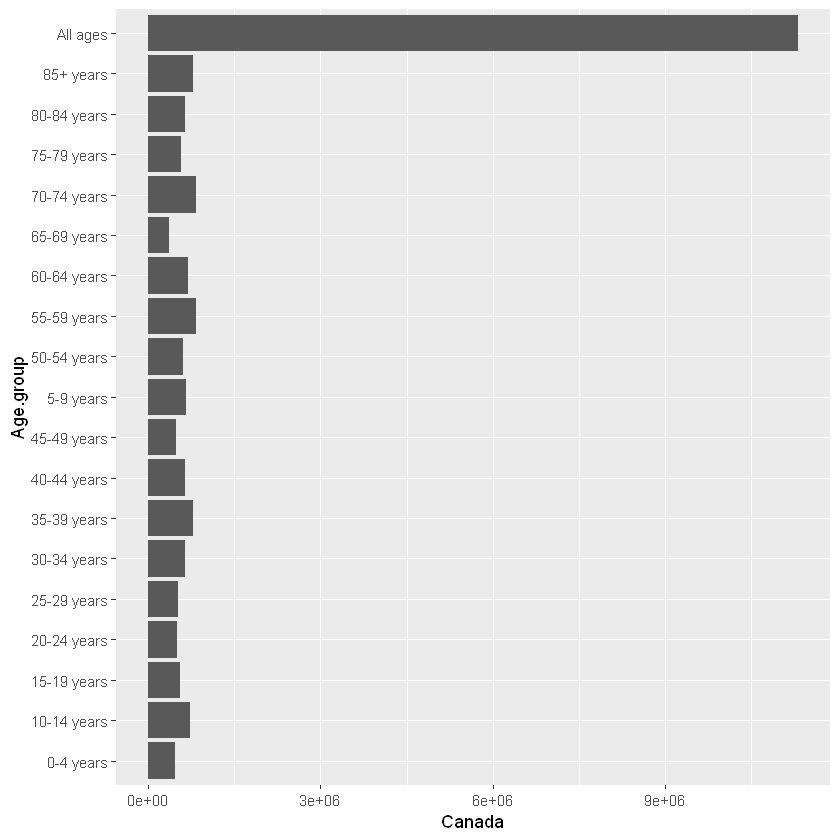

In [68]:
ggplot(data_frame_out, aes(Canada,Age.group)) + geom_col()